In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f(x, y):
    return np.sin(x * y)


def phi(x, y):
    return x ** 2 + y ** 2


In [3]:
def square_to_flat(N, i, j):
    return i * N + j


def flat_to_square(N, k):
    return k // N, k % N


In [4]:
def solve_CGM(A, b, tolerance=1e-4, max_iterations=100000):
    """共轭梯度法求解线性方程组"""
    n = len(b)
    x = np.zeros(n)
    r = b - A @ x
    p = r.copy()

    for k in range(max_iterations):
        Ap = A @ p
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap

        if np.linalg.norm(r_new) < tolerance:
            break

        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new

    return x


In [5]:
def func(n):
    x, y = np.ogrid[0:1:(n+1)*1j, 0:1:(n+1)*1j]
    fij = f(x, y)
    phiij = phi(x, y)
    h = 1 / n

    A = np.zeros(((n+1)**2, (n+1)**2))
    b = np.zeros((n+1)**2)
    for i in range(0, n+1):
        for j in range(0, n+1):
            if i == 0 or i == n or j == 0 or j == n:
                k = square_to_flat(n+1, i, j)
                A[k, k] = 1
                b[k] = phiij[i, j]
            else:
                k = square_to_flat(n+1, i, j)
                A[k, k] = 1 + h**2 / 4
                A[k, square_to_flat(n+1, i-1, j)] = -1/4
                A[k, square_to_flat(n+1, i, j-1)] = -1/4
                A[k, square_to_flat(n+1, i+1, j)] = -1/4
                A[k, square_to_flat(n+1, i, j+1)] = -1/4
                b[k] = h**2 / 4 * fij[i, j]

    x= solve_CGM(A, b)
    u = x.reshape((n+1, n+1))

    print(u)

    plt.figure(figsize=(12, 8))
    plt.imshow(u, cmap='hot', origin='lower', extent=[0, 1, 0, 1])
    plt.colorbar()
    plt.title(f"N = {n}")
    plt.show()


[[0.         0.00250001 0.01000002 0.02250005 0.04000009 0.06250015
  0.09000021 0.12250029 0.16000038 0.20250048 0.25000059 0.30250071
  0.36000085 0.42250099 0.49000115 0.56250132 0.6400015  0.7225017
  0.8100019  0.90250212 1.00000235]
 [0.00250001 0.02143897 0.04037101 0.06131665 0.08520983 0.11254153
  0.14362507 0.17865746 0.2177679  0.26104335 0.30854144 0.36028168
  0.41626795 0.47647747 0.54085353 0.60931076 0.6816997  0.75779827
  0.83723025 0.91930393 1.00250236]
 [0.01000002 0.04037101 0.06880286 0.09732973 0.1271658  0.15908286
  0.19362381 0.23113459 0.27185869 0.31595846 0.36353797 0.41464295
  0.46927416 0.52739381 0.58889302 0.65361614 0.72129696 0.79155525
  0.86379666 0.93711898 1.01000237]
 [0.02250005 0.06131665 0.09732973 0.13224178 0.16727499 0.20333273
  0.24106202 0.28089746 0.32316886 0.36809553 0.41581745 0.46639926
  0.51984528 0.57610344 0.63502733 0.69641242 0.75991979 0.82509847
  0.8912573  0.95748169 1.0225024 ]
 [0.04000009 0.08520983 0.1271658  0.1672

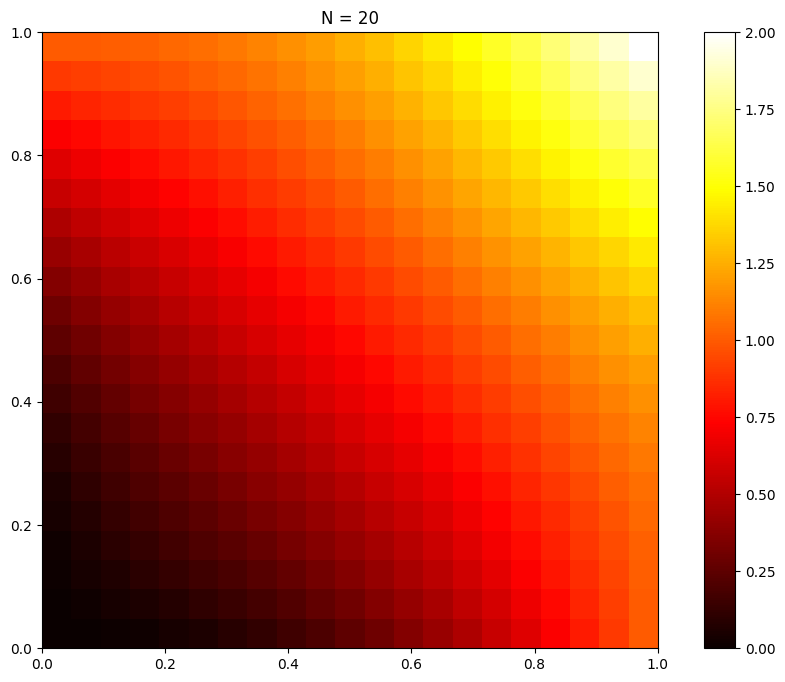

In [6]:
func(20)
